In [14]:
import pandas as pd
import numpy as np
from ta import add_all_ta_features
from ta.utils import dropna
from backtesting import Backtest, Strategy
import backtesting
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [15]:
plt.style.use('seaborn-v0_8')
backtesting.set_bokeh_output(notebook=False)

In [16]:
data = pd.read_csv('GBPUSD_2020_to_2025_15min.CSV')
data['date'] = pd.to_datetime(data['date'])
data

,date,Open,Low,High,Close,Volume
0,2020-01-02 01:45:00,1.32187,1.32187,1.32214,1.32214,69
1,2020-01-02 02:00:00,1.32218,1.32161,1.32284,1.32251,4317
2,2020-01-02 02:15:00,1.32251,1.32148,1.32295,1.32205,2867
3,2020-01-02 02:30:00,1.32203,1.32097,1.32234,1.32212,5135
4,2020-01-02 02:45:00,1.32212,1.32171,1.32265,1.32197,2497
...,...,...,...,...,...,...
123597,2024-12-31 14:00:00,1.25099,1.25050,1.25194,1.25189,2727
123598,2024-12-31 14:15:00,1.25189,1.25142,1.25203,1.25159,2511
123599,2024-12-31 14:30:00,1.25159,1.25083,1.25159,1.25103,2927
123600,2024-12-31 14:45:00,1.25103,1.25059,1.25124,1.25092,2501


In [17]:
data_ta = add_all_ta_features(data, open='Open', high='High', low='Low', close='Close', volume='Volume')

In [18]:
data_ta = data_ta.drop(['trend_psar_up', 'trend_psar_down', 'trend_psar_up_indicator'], axis=1)

In [19]:
data_ta = data_ta.dropna(axis=0)
data_ta

,date,Open,Low,High,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
78,2020-01-02 21:15:00,1.31372,1.31365,1.31425,1.31401,2747,-1.951829e+04,-41117,-0.064781,-0.216327,...,-0.004975,-0.002837,-0.002138,-3.982025,-16.061355,12.079330,1.314889,0.022836,0.022833,-0.614912
79,2020-01-02 21:30:00,1.31401,1.31392,1.31436,1.31411,2454,-1.985293e+04,-38663,-0.061394,-0.150366,...,-0.006316,-0.003533,-0.002784,-1.487140,-13.146512,11.659372,1.314859,0.007610,0.007610,-0.607349
80,2020-01-02 21:45:00,1.31410,1.31226,1.31437,1.31280,4429,-2.201495e+04,-43092,-0.096800,-0.957741,...,-0.015247,-0.005876,-0.009372,7.548078,-9.007594,16.555672,1.314567,-0.099687,-0.099737,-0.706430
81,2020-01-02 22:00:00,1.31280,1.31271,1.31341,1.31328,2763,-2.027821e+04,-40329,-0.043196,-0.631458,...,-0.019158,-0.008532,-0.010626,8.258794,-5.554317,13.813110,1.314444,0.036563,0.036556,-0.670126
82,2020-01-02 22:15:00,1.31329,1.31270,1.31333,1.31295,3868,-2.107637e+04,-44197,-0.059493,-0.723598,...,-0.024008,-0.011627,-0.012380,12.109214,-2.021611,14.130824,1.314186,-0.025128,-0.025131,-0.695085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123597,2024-12-31 14:00:00,1.25099,1.25050,1.25194,1.25189,2727,9.244922e+06,1293047,-0.194532,-0.114411,...,-0.052724,-0.053970,0.001246,-6.757876,2.513734,-9.271610,1.252298,0.071943,0.071917,-5.313356
123598,2024-12-31 14:15:00,1.25189,1.25142,1.25203,1.25159,2511,9.243810e+06,1290536,-0.183249,-0.205681,...,-0.049072,-0.052991,0.003918,-9.113039,0.188379,-9.301418,1.252289,-0.023964,-0.023967,-5.336046
123599,2024-12-31 14:30:00,1.25159,1.25083,1.25159,1.25103,2927,9.242424e+06,1287609,-0.170397,-0.410458,...,-0.049221,-0.052237,0.003016,-10.070606,-1.863418,-8.207188,1.252269,-0.044743,-0.044753,-5.378402
123600,2024-12-31 14:45:00,1.25103,1.25059,1.25124,1.25092,2501,9.242462e+06,1285108,-0.145682,-0.391123,...,-0.049478,-0.051685,0.002207,-11.740874,-3.838909,-7.901965,1.252259,-0.008793,-0.008793,-5.386722


In [20]:
data_ta.columns

Index(['date', 'Open', 'Low', 'High', 'Close', 'Volume', 'volume_adi',
       'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em',
       'volume_vpt', 'volume_vwap', 'volume_mfi', 'volume_nvi',
       'volatility_bbm', 'volatility_bbh', 'volatility_bbl', 'volatility_bbw',
       'volatility_bbp', 'volatility_bbhi', 'volatility_bbli',
       'volatility_kcc', 'volatility_kch', 'volatility_kcl', 'volatility_kcw',
       'volatility_kcp', 'volatility_kchi', 'volatility_kcli',
       'volatility_dcl', 'volatility_dch', 'volatility_dcm', 'volatility_dcw',
       'volatility_dcp', 'volatility_atr', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
       'tren

In [21]:
n = 500
rand_idx = random.randint(0, len(data_ta) - n)
data_sample = data_ta.iloc[rand_idx:rand_idx+n, :]
data_sample['date'] = pd.Series(data_sample['date']).apply(str)
data_sample

,date,Open,Low,High,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
44562,2021-11-05 15:30:00,1.34894,1.3486,1.34900,1.34884,863,1.579375e+06,604202,0.095679,0.063977,...,0.036574,0.046575,-0.010001,-18.471522,-13.897835,-4.573687,1.348098,-0.008154,-0.008155,2.019453
44563,2021-11-05 15:45:00,1.34884,1.3482,1.34932,1.34928,1155,1.580448e+06,605357,0.182667,0.127437,...,0.036967,0.044653,-0.007686,-17.894187,-14.697105,-3.197081,1.348123,0.032621,0.032615,2.052733
44564,2021-11-05 16:00:00,1.34921,1.3490,1.34950,1.34918,785,1.580228e+06,604572,0.108825,0.098018,...,0.036263,0.042975,-0.006712,-19.633904,-15.684465,-3.949439,1.348128,-0.007411,-0.007412,2.045169
44565,2021-11-05 16:15:00,1.34920,1.3489,1.34940,1.34930,560,1.580564e+06,605132,0.073758,0.093615,...,0.036007,0.041582,-0.005574,-22.523894,-17.052351,-5.471543,1.348139,0.008894,0.008894,2.054245
44566,2021-11-05 16:30:00,1.34929,1.3486,1.34950,1.34935,589,1.580957e+06,605721,0.076896,0.084449,...,0.035692,0.040404,-0.004712,-24.680653,-18.578011,-6.102642,1.348148,0.003706,0.003706,2.058027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45057,2021-11-15 00:45:00,1.34330,1.3433,1.34400,1.34367,747,1.630162e+06,608018,-0.001974,0.091575,...,0.027466,0.025057,0.002409,-1.836133,-3.704123,1.867990,1.342636,0.015631,0.015630,1.628421
45058,2021-11-15 01:00:00,1.34375,1.3430,1.34392,1.34318,1235,1.629410e+06,606783,-0.017555,-0.007957,...,0.026403,0.025326,0.001076,3.909467,-2.181405,6.090872,1.342656,-0.036467,-0.036474,1.591359
45059,2021-11-15 01:15:00,1.34300,1.3427,1.34325,1.34290,766,1.629201e+06,606017,-0.078262,-0.037460,...,0.023605,0.024982,-0.001377,3.369467,-1.071231,4.440698,1.342659,-0.020846,-0.020848,1.570182
45060,2021-11-15 01:30:00,1.34307,1.3428,1.34330,1.34300,694,1.629062e+06,606711,-0.104214,-0.022194,...,0.021739,0.024333,-0.002595,2.168489,-0.423287,2.591775,1.342668,0.007447,0.007446,1.577745


In [22]:
def format_xaxis(axs, data_sample):
    for ax in axs:
        ax.set_xticks([_ for i, _ in enumerate(data_sample['date']) if i % 10 == 0])
        ax.set_xticklabels([])
        ax.set_xlabel('')
        ax.legend()

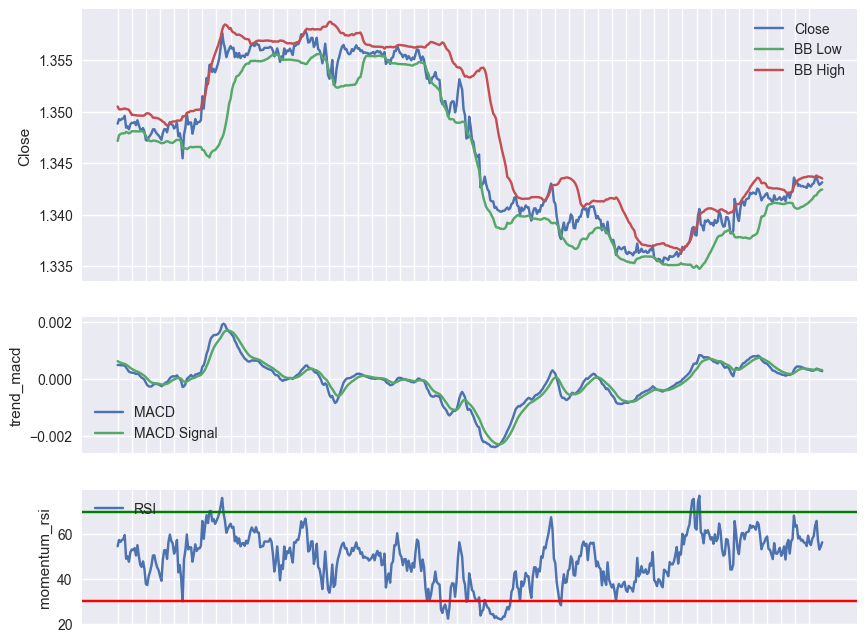

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [2, 1, 1]})
sns.lineplot(data_sample, x='date', y='Close', label='Close', ax=ax1)
sns.lineplot(data_sample, x='date', y='volatility_bbl', label='BB Low', ax=ax1)
sns.lineplot(data_sample, x='date', y='volatility_bbh', label='BB High', ax=ax1)

sns.lineplot(data_sample, x='date', y='trend_macd', label='MACD', ax=ax2)
sns.lineplot(data_sample, x='date', y='trend_macd_signal', label='MACD Signal', ax=ax2)

sns.lineplot(data_sample, x='date', y='momentum_rsi', label='RSI', ax=ax3)
ax3.axhline(y=30, color='r')
ax3.axhline(y=70, color='g')

format_xaxis([ax1, ax2, ax3], data_sample)

In [39]:
class TAStrat(Strategy):
    bb_long_lookback = 8
    bb_short_lookback = 8
    
    macd_long_lookback = 8
    macd_short_lookback = 8
    
    min_bb_dist_for_open = 0.01
    
    tp = 0.01
    sl = 0.01
    
    def init(self):
        ...

    def next(self):
        current_price = self.data.Close[-1]
        bollinger_lower = self.data.volatility_bbl[-1]
        bollinger_upper = self.data.volatility_bbh[-1]
        
        macd = self.data.trend_macd[-1]
        macd_signal = self.data.trend_macd_signal[-1]
        
        current_bb_dist = (bollinger_upper - bollinger_lower) / bollinger_lower
        
        if current_bb_dist >= self.min_bb_dist_for_open:
        
            if all([
                current_price > bollinger_lower,
                any(current_price < np.array(self.data.volatility_bbl[-self.bb_long_lookback:-1])),
                macd > macd_signal,
                any(macd < np.array(self.data.trend_macd_signal[-self.macd_long_lookback:-1]))
            ]):
                self.buy(tp=current_price * (1 + self.tp), sl=current_price * (1 - self.sl))

            elif all([
                current_price < bollinger_upper,
                any(current_price > np.array(self.data.volatility_bbh[-self.bb_short_lookback:-1])),
                macd < macd_signal,
                any(macd > np.array(self.data.trend_macd_signal[-self.macd_short_lookback:-1]))
            ]):
                self.sell(tp=current_price * (1 - self.tp), sl=current_price * (1 + self.sl))
        
        


In [48]:
bt = Backtest(data_ta, TAStrat, cash=10_000, commission=.0002, exclusive_orders=True, hedging=False)
# bt.run()

In [44]:
stats = bt.optimize(
    bb_long_lookback=[2, 4, 8, 16, 32, 64],
    bb_short_lookback=[2, 4, 8, 16, 32, 64],
    macd_long_lookback=[2, 4, 8, 16, 32, 64],
    macd_short_lookback=[4, 8, 16, 32, 64],
    min_bb_dist_for_open=[0.001, 0.0025, 0.005, 0.0075, 0.01],
    tp=[0.0025, 0.005, 0.01, 0.025, 0.05],
    sl=[0.0025, 0.005, 0.01, 0.025, 0.05],
    constraint=lambda p: p.tp > p.sl,
    max_tries=200,
    random_state=5
)
stats

  0%|          | 0/9 [00:00<?, ?it/s]

Start                                    78.0
End                                  123601.0
Duration                             123523.0
Exposure Time [%]                   99.656073
Equity Final [$]                 42168.919663
Equity Peak [$]                  42489.838863
Return [%]                         321.689197
Buy & Hold Return [%]               -4.785352
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -17.556871
Avg. Drawdown [%]                   -0.337013
Max. Drawdown Duration                57283.0
Avg. Drawdown Duration             256.306889
# Trades                               5390.0
Win Rate [%]                        49.499072
Best Trade [%]                       5.050193
Worst Trade [%]                     -2.500903
Avg. Trade [%]                    

In [47]:
stats['_strategy']

<Strategy TAStrat(bb_long_lookback=64,bb_short_lookback=64,macd_long_lookback=64,macd_short_lookback=64,min_bb_dist_for_open=0.005,tp=0.05,sl=0.025)>

In [49]:
bt.run(
    bb_long_lookback=64,
    bb_short_lookback=64,
    macd_long_lookback=64,
    macd_short_lookback=64,
    min_bb_dist_for_open=0.005,
    tp=0.05,
    sl=0.025,
)

Start                                    78.0
End                                  123601.0
Duration                             123523.0
Exposure Time [%]                   99.656073
Equity Final [$]                 14355.871889
Equity Peak [$]                  16400.153604
Return [%]                          43.558719
Buy & Hold Return [%]               -4.785352
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -45.480479
Avg. Drawdown [%]                   -2.318169
Max. Drawdown Duration                63563.0
Avg. Drawdown Duration            3331.675676
# Trades                               5390.0
Win Rate [%]                        39.536178
Best Trade [%]                       5.031199
Worst Trade [%]                     -2.520399
Avg. Trade [%]                    

In [45]:
bt.plot()

Row(id='4349', ...)